<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Pivot_points_POLY_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Imports

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas-datareader
from pandas_datareader import data as pdr
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")
clear_output()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!pip install yfinance
#!conda install -c ranaroussi yfinance --y
import yfinance as yf # requires yfinance - pip install yfinance
clear_output()

In [4]:
!pip install backtesting
clear_output()
# Библиотеки backtesting
from backtesting import Backtest, Strategy

Loading BokehJS ...

In [5]:
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_n_short_strategy.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Long_strategy.py
clear_output()
# Библиотеки из ai_tr_libs
from Long_n_short_strategy import Long_n_Short_Strategy as LnS
from Long_strategy import Long_Strategy as LS

# 1d: counter_lvl = 2

## Загружаем данные

In [6]:
# Начните с активации обходного пути Yahoo Finance и установки начальной и конечной точек фрейма данных.
# здесь Yf.pdr_override () активирует ваши условия обходного пути, а остальное установит ваш фрейм данных.
yf.pdr_override()

start = '2021-01-01'
#end = dt.datetime(2019,12,31)
window = 2

now = dt.datetime.now()
interval = '1d'
stock = 'POLY.ME'

buy_signals = pd.DataFrame() # dataframe для записи сигналов
sell_signals = pd.DataFrame() # dataframe для записи сигналов

In [7]:
df = pdr.get_data_yahoo(stock,
                        start,
                        #end,
                        now,
                        interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
del df['Adj Close'], df['Volume']
df.index.name = 'Date'
print(df)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close
Date                                                          
2021-01-04  1757.000000  1851.000000  1750.300049  1848.400024
2021-01-05  1825.300049  1869.800049  1798.000000  1849.900024
2021-01-06  1845.000000  1856.199951  1816.000000  1827.300049
2021-01-08  1827.300049  1827.300049  1827.300049  1827.300049
2021-01-11  1785.000000  1805.199951  1753.300049  1761.699951
...                 ...          ...          ...          ...
2021-05-24  1788.800049  1798.000000  1777.699951  1782.599976
2021-05-25  1794.000000  1794.000000  1753.000000  1769.099976
2021-05-26  1796.000000  1797.500000  1778.000000  1780.099976
2021-05-27  1778.900024  1807.000000  1774.699951  1792.400024
2021-05-28  1789.699951  1798.900024  1738.199951  1761.099976

[101 rows x 4 columns]


## Разметка Y

In [8]:
## Размечаем Y

#from pandas_datareader import data as pdr 
#import datetime as dt


def SELL(data, counter_lvl, plotting):
    
    signals = pd.DataFrame() # dataframe для записи сигналов

    #df['High'].plot(label='high')
    if plotting == True:
        plt.figure(figsize=(22, 8))
        data['Close'].plot(label='close')
        
    pivots =[]
    dates = []
    counter = 0
    lastPivot = 0
    Range = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    daterange = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        
    for i in data.index:
        currentMax = max(Range , default=0)
        #value=round(df["High"][i],2)
        value=data['Close'][i]
            
        Range=Range[1:19]
        Range.append(value)
        daterange=daterange[1:19]
        daterange.append(i)
            
        if currentMax == max(Range , default=0):
            counter+=1
        else:
            counter = 0
        if counter ==  counter_lvl:
            lastPivot = currentMax
            dateloc = Range.index(lastPivot)
            lastDate = daterange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)
    #print()
    #timeD = dt.timedelta(days=500)

    for index in range(1, len(pivots)):
        #print(str(pivots[index]) + " :" + str(dates[index]))
        line = pd.DataFrame({'Date':[dates[index]], 'price':[pivots[index]], 'Signal':[-1]})
        signals = signals.append(line, ignore_index=True)

        #plt.plot_date([dates[index], dates[index] + timeD],
        #    [pivots[index], pivots[index]] , linestyle='solid' , linewidth=1, marker=',', color='red')

        if plotting == True:
            plt.plot_date([dates[index], dates[index]],
            [pivots[index], pivots[index]], marker='v', color='red')

    if plotting == True:
        plt.grid()
        plt.show()

    return signals
    


def BUY(data, counter_lvl, plotting):
    
    signals = pd.DataFrame() # dataframe для записи сигналов

    #df['Low'].plot(label='low')
    if plotting == True:
        plt.figure(figsize=(22, 8))
        data['Close'].plot(label='close')
        
    pivots =[]
    dates = []
    counter = 0
    lastPivot = 0
    Range = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    daterange = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        
    for i in data.index:
        currentMax = min(Range , default=0)
        #value=round(df["Low"][i], 2)
        value=data['Close'][i]
        
            
        Range=Range[1:20]
        Range.append(value)
        daterange=daterange[1:20]
        daterange.append(i)
            
        if currentMax == min(Range , default=0):
            counter+=1
        else:
            counter = 0
        if counter ==  counter_lvl:
            lastPivot=currentMax
            dateloc =Range.index(lastPivot)
            lastDate = daterange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)
    #print()
    #timeD = dt.timedelta(days=500)

    for index in range(1, len(pivots)):
        #print(str(pivots[index]) + " :" + str(dates[index]))
        line = pd.DataFrame({'Date':[dates[index]], 'price':[pivots[index]], 'Signal':[1]})
        signals = signals.append(line, ignore_index=True)
            
        #plt.plot_date([dates[index], dates[index] + timeD],
        #    [pivots[index], pivots[index]] , linestyle='solid' , linewidth=1, marker=',', color='red')

        if plotting == True:
            plt.plot_date([dates[index], dates[index]],
            [pivots[index], pivots[index]], marker='^', color='green')

    if plotting == True:
        plt.grid()
        plt.show()

    return signals
    

In [9]:
#import os
#os.chdir('/content/drive/MyDrive/_Проекты/AI_Trading/AI-trading_courses/4. НС и торговля по паттернам/Подбор оптимальных параметров')
#from markup_y import SELL, BUY

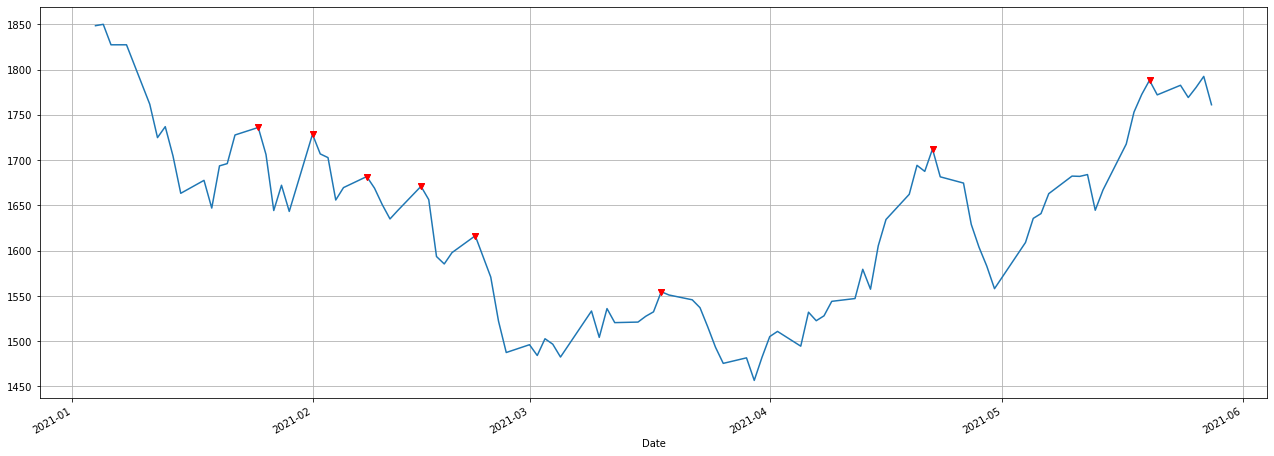

In [10]:
sell_signals = SELL(df, counter_lvl = window, plotting = True)
sell_signals = sell_signals.set_index('Date')
#sell_signals[-10:]

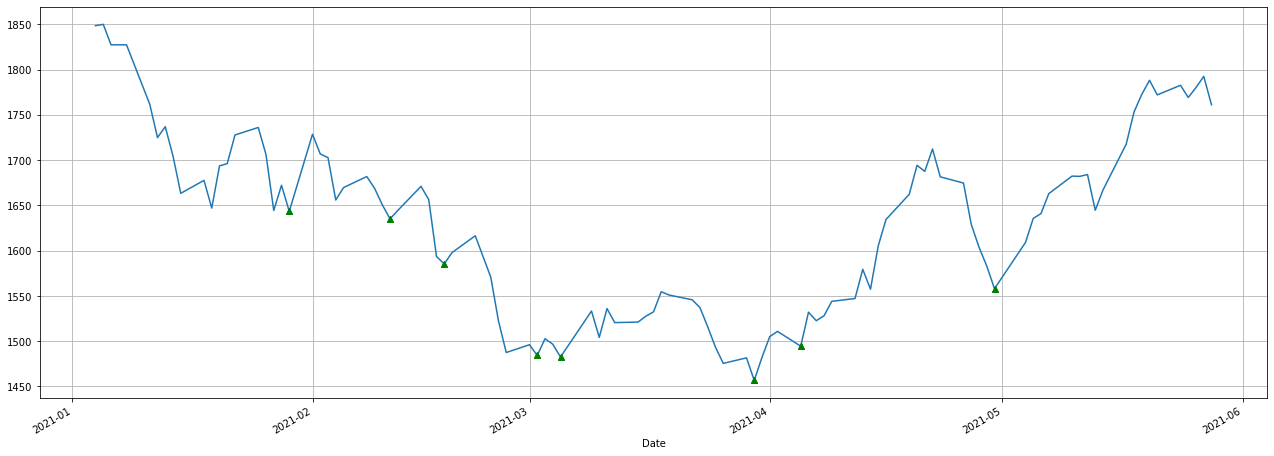

In [11]:
buy_signals = BUY(df, counter_lvl = window, plotting=True)
buy_signals = buy_signals.set_index('Date')
#buy_signals[-10:]

## Обьединение датафреймов

In [12]:
signals = sell_signals.append(buy_signals)
signals.index.rename('Date', inplace=True)
signals[-5:]

,price,Signal
Date,,
2021-03-02,1484.199951,1
2021-03-05,1482.500000,1
2021-03-30,1456.699951,1
2021-04-05,1494.500000,1
2021-04-30,1558.000000,1


In [13]:
df_new = df

df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
df_new = df_new.fillna(0)
#df_new.loc[df_new['Signal'] != 0]
df_new

,Open,High,Low,Close,Signal
Date,,,,,
2021-01-04,1757.000000,1851.000000,1750.300049,1848.400024,0.0
2021-01-05,1825.300049,1869.800049,1798.000000,1849.900024,0.0
2021-01-06,1845.000000,1856.199951,1816.000000,1827.300049,0.0
2021-01-08,1827.300049,1827.300049,1827.300049,1827.300049,0.0
2021-01-11,1785.000000,1805.199951,1753.300049,1761.699951,0.0
...,...,...,...,...,...
2021-05-24,1788.800049,1798.000000,1777.699951,1782.599976,0.0
2021-05-25,1794.000000,1794.000000,1753.000000,1769.099976,0.0
2021-05-26,1796.000000,1797.500000,1778.000000,1780.099976,0.0


## График торговли

### Long

In [14]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [15]:
stats

Start                     2021-01-04 00:00:00
End                       2021-05-28 00:00:00
Duration                    144 days 00:00:00
Exposure Time [%]                     51.4851
Equity Final [$]                       150879
Equity Peak [$]                        150879
Return [%]                            50.8788
Buy & Hold Return [%]                -4.72301
Return (Ann.) [%]                     179.053
Volatility (Ann.) [%]                 47.1111
Sharpe Ratio                          3.80065
Sortino Ratio                         29.4875
Calmar Ratio                           76.896
Max. Drawdown [%]                     -2.3285
Avg. Drawdown [%]                    -1.11515
Max. Drawdown Duration        7 days 00:00:00
Avg. Drawdown Duration        4 days 00:00:00
# Trades                                    6
Win Rate [%]                              100
Best Trade [%]                        17.0714
Worst Trade [%]                       1.55555
Avg. Trade [%]                    

### Long & Short

In [16]:
# Стратегия Long & Short (подключен класс стратегии LnS)
bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
stats = bt.run()
bt.plot(plot_volume=True, relative_equity=True)

In [17]:
stats

Start                     2021-01-04 00:00:00
End                       2021-05-28 00:00:00
Duration                    144 days 00:00:00
Exposure Time [%]                     64.3564
Equity Final [$]                       173180
Equity Peak [$]                        173180
Return [%]                            73.1801
Buy & Hold Return [%]                -4.72301
Return (Ann.) [%]                     293.608
Volatility (Ann.) [%]                 71.7424
Sharpe Ratio                          4.09254
Sortino Ratio                         44.7257
Calmar Ratio                          126.673
Max. Drawdown [%]                    -2.31784
Avg. Drawdown [%]                    -1.10179
Max. Drawdown Duration        7 days 00:00:00
Avg. Drawdown Duration        4 days 00:00:00
# Trades                                    7
Win Rate [%]                              100
Best Trade [%]                        17.0714
Worst Trade [%]                       4.44562
Avg. Trade [%]                    

In [18]:
# журнал торговли
trade_journal = stats._trades
trade_journal[-10:]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-57,14,18,1729.056000,1643.300049,4888.089217,0.049597,2021-01-25,2021-01-29,4 days
1,-60,19,27,1721.586000,1635.000000,5195.160000,0.050294,2021-02-01,2021-02-11,10 days
2,-66,29,32,1664.316000,1585.300049,5215.052777,0.047477,2021-02-15,2021-02-18,3 days
3,-71,34,39,1609.934424,1484.199951,8927.147593,0.078099,2021-02-22,2021-03-02,8 days
4,83,42,50,1488.430000,1554.599976,5492.107974,0.044456,2021-03-05,2021-03-18,13 days
5,88,58,75,1462.526751,1712.199951,21971.241617,0.170714,2021-03-30,2021-04-22,23 days
6,96,81,94,1564.232000,1788.099976,21491.325656,0.143117,2021-04-30,2021-05-20,20 days


In [1]:
file_name = 'outputs/trade_journal' + interval + '.csv'
trade_journal.to_csv(file_name, sep='\t')

NameError: name 'trade_journal' is not defined

# 1d: Подбор оптимального counter_lvl

In [19]:
LnS_results = pd.DataFrame() # dataframe для записи результатов подбора оптимального окна counter_lvl

for i in range(2, 19):
    
    # Разметим Y
    sell_signals = SELL(df, counter_lvl = i, plotting = False)
    sell_signals = sell_signals.set_index('Date')
    buy_signals = BUY(df, counter_lvl = i, plotting = False)
    buy_signals = buy_signals.set_index('Date')
    
    # Обьединим датафреймы
    signals = sell_signals.append(buy_signals)
    df_new = df

    df_new = pd.merge(df_new, signals['Signal'], on=('Date'), how ='left')
    df_new = df_new.fillna(0)
    
    # Backtesting
    # Стратегия Long & Short (подключен класс стратегии LnS)
    bt = Backtest(df_new, LnS, cash=100000, commission=.004, trade_on_close=True)
    stats = bt.run()
    
    line = pd.DataFrame({'window':[i],
                         'Trades':[stats[17]],
                         'Return [%]':[stats[6]],
                         'Buy & Hold Return [%]':[stats[7]],
                         'Return (Ann.) [%]':[stats[8]],
                         'Sharpe Ratio':[stats[10]],
                         'Sortino Ratio':[stats[11]],
                         'Calmar Ratio':[stats[12]],
                         'Max. Drawdown [%]':[stats[13]],
                         'Avg. Drawdown [%]]':[stats[14]],
                         'Win Rate [%]':[stats[18]]
                        })
    LnS_results = LnS_results.append(line, ignore_index=True)


In [20]:
LnS_results

,counter_lvl,Trades,Return [%],Buy & Hold Return [%],Return (Ann.) [%],Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max. Drawdown [%],Avg. Drawdown [%]],Win Rate [%]
0,2,7,73.180125,-4.723006,293.608472,4.092540,44.725702,126.673322,-2.317840,-1.101787,100.000000
1,3,6,39.392317,-4.723006,129.025079,3.963225,29.561311,72.475807,-1.780250,-0.956177,83.333333
2,4,5,36.314881,-4.723006,116.616790,3.797156,23.729539,59.433126,-1.962151,-1.035937,80.000000
3,5,4,46.477414,-4.723006,159.182703,3.777962,24.213285,68.681360,-2.317699,-1.123611,100.000000
4,6,4,46.477414,-4.723006,159.182703,3.777962,24.213285,68.681360,-2.317699,-1.123611,100.000000
5,7,4,46.477414,-4.723006,159.182703,3.777962,24.213285,68.681360,-2.317699,-1.123611,100.000000
6,8,3,39.957291,-4.723006,131.348172,3.757499,21.337400,56.203789,-2.336999,-1.086422,100.000000


**[Calmar ratio](https://en.wikipedia.org/wiki/Calmar_ratio)** , **[The Calmar Ratio](https://www.investopedia.com/terms/c/calmarratio.asp)**

----

- Коэффициент Кальмара - это показатель доходности инвестиционных фондов с поправкой на риск, созданный менеджером фонда Терри Янгом в 1991 году.
- Коэффициент Кальмара использует максимальную просадку фонда как единственную меру риска, что делает его уникальным.
- С другой стороны, упор в соотношении Кальмара на просадку означает, что его взгляд на риск довольно ограничен по сравнению с другими индикаторами, и он игнорирует общую волатильность.